In [66]:
#importing files
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.metrics import mean_squared_error as mse

In [67]:
df = pd.read_csv('C:/Users/Dell/Desktop/timesData.csv')

In [68]:
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42:58:00,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45:55:00,2011


In [69]:
#filtering for data year=2016
df_filtered = df.query('year>2015')
df_filtered.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46:54:00,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42:58:00,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55,92.8,"18,812",11.8,34%,46:54:00,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84,88.6,99.7,95.4,92,"11,074",9.0,33%,37 : 63,2016


In [70]:
#dropping world rank column
df_filtered.drop(["world_rank"], axis = 1, inplace = True)
df_filtered.head()

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,California Institute of Technology,United States of America,95.6,64,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016
1804,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46:54:00,2016
1805,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42:58:00,2016
1806,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55,92.8,"18,812",11.8,34%,46:54:00,2016
1807,Massachusetts Institute of Technology,United States of America,89.4,84,88.6,99.7,95.4,92,"11,074",9.0,33%,37 : 63,2016


In [71]:
#checking for missing values
df_filtered.isnull().sum()

university_name            0
country                    0
teaching                   0
international              0
research                   0
citations                  0
income                     0
total_score                0
num_students               7
student_staff_ratio        7
international_students    10
female_male_ratio         61
year                       0
dtype: int64

In [72]:
#dropping the missing values
df_filtered.dropna(subset=['num_students', 'student_staff_ratio', 'international_students', 'female_male_ratio'], inplace=True)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [73]:
df_filtered.isnull().sum()

university_name           0
country                   0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
female_male_ratio         0
year                      0
dtype: int64

In [74]:
#dropping hyphens rows from income column
df_filtered=df_filtered[~df_filtered.income.str.contains("-")]
df_filtered

,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,California Institute of Technology,United States of America,95.6,64,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016
1804,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46:54:00,2016
1805,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42:58:00,2016
1806,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55,92.8,"18,812",11.8,34%,46:54:00,2016
1807,Massachusetts Institute of Technology,United States of America,89.4,84,88.6,99.7,95.4,92,"11,074",9.0,33%,37 : 63,2016
1809,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,"7,929",8.4,27%,45:55:00,2016
1810,Imperial College London,United Kingdom,83.3,96,88.5,96.7,53.7,89.1,"15,060",11.7,51%,37 : 63,2016
1811,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80,88.3,"18,178",14.7,37%,31 : 69,2016
1812,University of Chicago,United States of America,85.7,65,88.9,99.2,36.6,87.9,"14,221",6.9,21%,42:58:00,2016
1813,Johns Hopkins University,United States of America,77.6,70,90.4,98.2,100,87.6,"15,128",3.6,23%,50:50:00,2016


In [75]:
#replacing commas in num students column and replacing hyphens by 45 in total score column
df_filtered['num_students'] = df_filtered['num_students'].apply(lambda x: float(x.split()[0].replace(',', '')))
df_filtered['total_score'] = df_filtered['total_score'].apply(lambda x: float(x.split()[0].replace('-', '45')))
df_filtered

,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,California Institute of Technology,United States of America,95.6,64,97.6,99.8,97.8,95.2,2243.0,6.9,27%,33 : 67,2016
1804,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34%,46:54:00,2016
1805,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22%,42:58:00,2016
1806,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55,92.8,18812.0,11.8,34%,46:54:00,2016
1807,Massachusetts Institute of Technology,United States of America,89.4,84,88.6,99.7,95.4,92.0,11074.0,9.0,33%,37 : 63,2016
1809,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,7929.0,8.4,27%,45:55:00,2016
1810,Imperial College London,United Kingdom,83.3,96,88.5,96.7,53.7,89.1,15060.0,11.7,51%,37 : 63,2016
1811,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80,88.3,18178.0,14.7,37%,31 : 69,2016
1812,University of Chicago,United States of America,85.7,65,88.9,99.2,36.6,87.9,14221.0,6.9,21%,42:58:00,2016
1813,Johns Hopkins University,United States of America,77.6,70,90.4,98.2,100,87.6,15128.0,3.6,23%,50:50:00,2016


In [76]:
#dropping string # from international_students column
df_filtered['international_students'] = df_filtered['international_students'].map(lambda x: x.rstrip('%'))
df_filtered

,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,California Institute of Technology,United States of America,95.6,64,97.6,99.8,97.8,95.2,2243.0,6.9,27,33 : 67,2016
1804,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34,46:54:00,2016
1805,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22,42:58:00,2016
1806,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55,92.8,18812.0,11.8,34,46:54:00,2016
1807,Massachusetts Institute of Technology,United States of America,89.4,84,88.6,99.7,95.4,92.0,11074.0,9.0,33,37 : 63,2016
1809,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,7929.0,8.4,27,45:55:00,2016
1810,Imperial College London,United Kingdom,83.3,96,88.5,96.7,53.7,89.1,15060.0,11.7,51,37 : 63,2016
1811,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80,88.3,18178.0,14.7,37,31 : 69,2016
1812,University of Chicago,United States of America,85.7,65,88.9,99.2,36.6,87.9,14221.0,6.9,21,42:58:00,2016
1813,Johns Hopkins University,United States of America,77.6,70,90.4,98.2,100,87.6,15128.0,3.6,23,50:50:00,2016


In [77]:
#removing hyphens from female_male_ratio column
df_filtered = df_filtered[~df_filtered.female_male_ratio.str.contains("-")]
df_filtered

,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,California Institute of Technology,United States of America,95.6,64,97.6,99.8,97.8,95.2,2243.0,6.9,27,33 : 67,2016
1804,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34,46:54:00,2016
1805,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22,42:58:00,2016
1806,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55,92.8,18812.0,11.8,34,46:54:00,2016
1807,Massachusetts Institute of Technology,United States of America,89.4,84,88.6,99.7,95.4,92.0,11074.0,9.0,33,37 : 63,2016
1809,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,7929.0,8.4,27,45:55:00,2016
1810,Imperial College London,United Kingdom,83.3,96,88.5,96.7,53.7,89.1,15060.0,11.7,51,37 : 63,2016
1811,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80,88.3,18178.0,14.7,37,31 : 69,2016
1812,University of Chicago,United States of America,85.7,65,88.9,99.2,36.6,87.9,14221.0,6.9,21,42:58:00,2016
1813,Johns Hopkins University,United States of America,77.6,70,90.4,98.2,100,87.6,15128.0,3.6,23,50:50:00,2016


In [78]:
#removing the third insignificant ratio from female_male_ratio column
df_filtered['female_male_ratio'] = df_filtered['female_male_ratio'].map(lambda x: x.rstrip(':00'))
df_filtered

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,California Institute of Technology,United States of America,95.6,64,97.6,99.8,97.8,95.2,2243.0,6.9,27,33 : 67,2016
1804,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34,46:54,2016
1805,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22,42:58,2016
1806,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55,92.8,18812.0,11.8,34,46:54,2016
1807,Massachusetts Institute of Technology,United States of America,89.4,84,88.6,99.7,95.4,92.0,11074.0,9.0,33,37 : 63,2016
1809,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,7929.0,8.4,27,45:55,2016
1810,Imperial College London,United Kingdom,83.3,96,88.5,96.7,53.7,89.1,15060.0,11.7,51,37 : 63,2016
1811,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80,88.3,18178.0,14.7,37,31 : 69,2016
1812,University of Chicago,United States of America,85.7,65,88.9,99.2,36.6,87.9,14221.0,6.9,21,42:58,2016
1813,Johns Hopkins University,United States of America,77.6,70,90.4,98.2,100,87.6,15128.0,3.6,23,50:5,2016


In [79]:
#converting ratio (string) to decimal (float)
for x in range(len(df_filtered)):
    idx = df_filtered.iloc[x].name
    fmr=df_filtered['female_male_ratio'].iloc[x]
    if type(fmr)!=float:
        if ":" in fmr:
            str_arr=fmr.split(':')
            dec_value=float(str_arr[0])/float(str_arr[1])
            df_filtered.set_value(idx, 'female_male_ratio', dec_value)
df_filtered

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,California Institute of Technology,United States of America,95.6,64,97.6,99.8,97.8,95.2,2243.0,6.9,27,0.492537,2016
1804,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34,0.851852,2016
1805,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22,0.724138,2016
1806,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55,92.8,18812.0,11.8,34,0.851852,2016
1807,Massachusetts Institute of Technology,United States of America,89.4,84,88.6,99.7,95.4,92.0,11074.0,9.0,33,0.587302,2016
1809,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,7929.0,8.4,27,0.818182,2016
1810,Imperial College London,United Kingdom,83.3,96,88.5,96.7,53.7,89.1,15060.0,11.7,51,0.587302,2016
1811,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80,88.3,18178.0,14.7,37,0.449275,2016
1812,University of Chicago,United States of America,85.7,65,88.9,99.2,36.6,87.9,14221.0,6.9,21,0.724138,2016
1813,Johns Hopkins University,United States of America,77.6,70,90.4,98.2,100,87.6,15128.0,3.6,23,10,2016


In [80]:
#checking if any rows have same values which might lead to two different unis being identified as one
ndf = df_filtered.drop(df_filtered.drop_duplicates(subset=['teaching', 'international', 'research', 'citations', 'income', 'num_students', 'student_staff_ratio', 'international_students', 'female_male_ratio'], keep=False).index)
ndf

,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year


In [81]:
X=df_filtered[['teaching','international', 'research', 'citations', 'income', 'num_students', 'student_staff_ratio', 'international_students', 'female_male_ratio']]
y=df_filtered['total_score']
X

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,female_male_ratio
1803,95.6,64,97.6,99.8,97.8,2243.0,6.9,27,0.492537
1804,86.5,94.4,98.9,98.8,73.1,19919.0,11.6,34,0.851852
1805,92.5,76.3,96.2,99.9,63.3,15596.0,7.8,22,0.724138
1806,88.2,91.5,96.7,97.0,55,18812.0,11.8,34,0.851852
1807,89.4,84,88.6,99.7,95.4,11074.0,9.0,33,0.587302
1809,85.1,78.5,91.9,99.3,52.1,7929.0,8.4,27,0.818182
1810,83.3,96,88.5,96.7,53.7,15060.0,11.7,51,0.587302
1811,77.0,97.9,95.0,91.1,80,18178.0,14.7,37,0.449275
1812,85.7,65,88.9,99.2,36.6,14221.0,6.9,21,0.724138
1813,77.6,70,90.4,98.2,100,15128.0,3.6,23,10


In [82]:
#scaling of features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[1.        , 0.61314655, 0.98609626, ..., 0.03888889, 0.32926829,
        0.01645446],
       [0.89381564, 0.94073276, 1.        , ..., 0.06790123, 0.41463415,
        0.03192688],
       [0.9638273 , 0.74568966, 0.97112299, ..., 0.04444444, 0.26829268,
        0.0264274 ],
       ...,
       [0.05367561, 0.08405172, 0.02352941, ..., 0.17345679, 0.02439024,
        0.01946712],
       [0.11901984, 0.17456897, 0.11336898, ..., 0.07098765, 0.09756098,
        0.01199127],
       [0.07351225, 0.11422414, 0.13796791, ..., 0.12345679, 0.04878049,
        0.02772991]])

In [83]:
#splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1)

In [84]:
#fitting regression decision tree 
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [85]:
y_pred = dt.predict(X_test)
y_pred

array([45. , 45. , 45. , 45. , 45. , 45. , 45. , 45. , 45. , 45. , 56.1,
       45. , 45. , 74.4, 45. , 59.5, 45. , 57.7, 45. , 45. , 45. , 45. ,
       45. , 45. , 45. , 52.1, 64.3, 45. , 45. , 62.3, 87.4, 64.3, 45. ,
       45. , 62.3, 45. , 45. , 45. , 45. , 78.2, 45. , 45. , 45. , 45. ,
       45. , 45. , 53.3, 45. , 45. , 45. , 54.1, 45. , 62.4, 45. , 45. ,
       45. , 62.5, 54.1, 45. , 62.5, 45. , 45. , 45. , 45. , 69.4, 45. ,
       45. , 58.8, 45. , 69.4, 79.5, 45. , 45. , 45. , 45. , 93.9, 54.1,
       52.1, 61. , 45. , 45. , 62.3, 45. , 45. , 45. , 45. , 45. , 45. ,
       50.3, 45. , 64.3, 45. , 45. , 64.3, 45. , 85.2, 45. , 45. , 45. ,
       45. , 58.5, 53.3, 45. , 45. , 45. , 62.3, 45. , 68.1, 45. , 45. ,
       45. , 45. , 45. , 45. , 45. , 45. , 45. , 45. , 45. , 45. , 59.7,
       57.2, 45. , 54.3, 45. , 45. , 51.9, 45. , 53.8, 45. , 45. , 69.7,
       45. , 45. , 45. , 45. , 45. , 54.1, 53.8, 45. , 45. , 45. , 58.8,
       79.2, 45. , 45. , 45. , 66.1, 45. , 52.2, 45

In [86]:
score = dt.score(X_test, y_test)
print(score)

0.9685075172423174


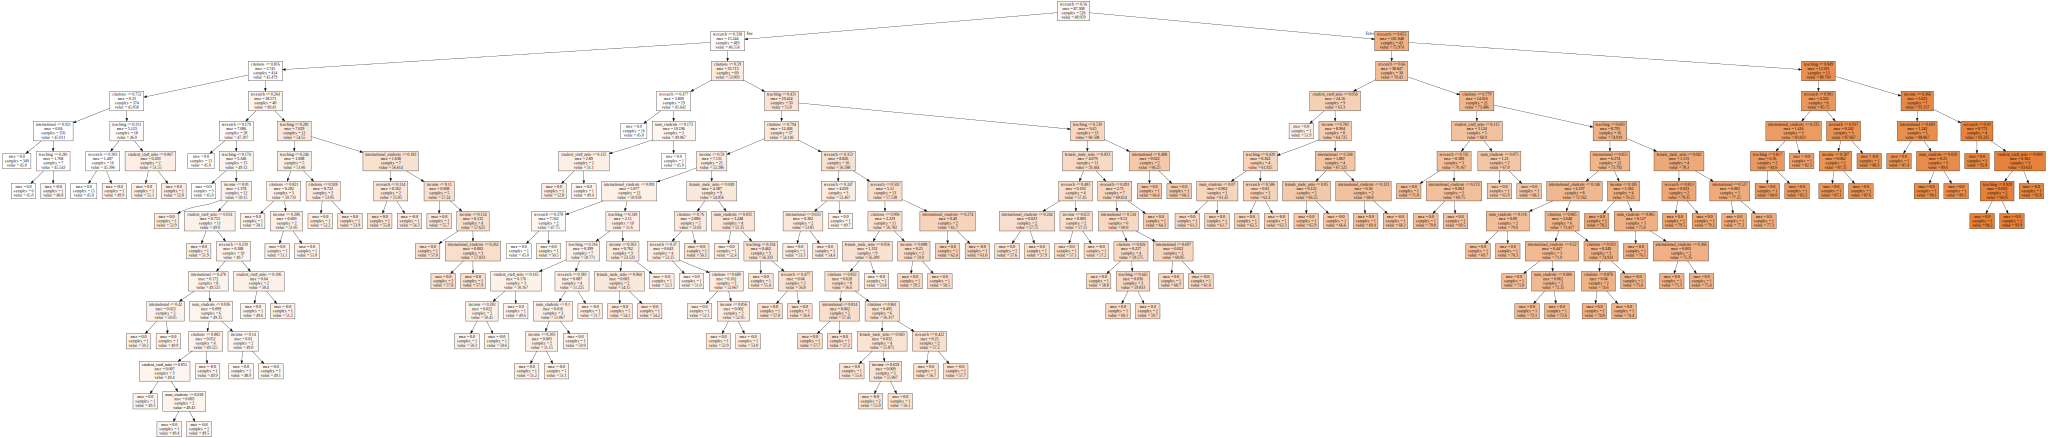

In [87]:
#plotting the decision tree
graph = Source(tree.export_graphviz(dt, out_file=None, feature_names=X.columns, filled = True))
display(SVG(graph.pipe(format='svg')))

In [89]:
mse(y_test, y_pred)

3.360397727272726

In [90]:
#Cross Validation to determine the optimal level of tree complexity
max_depth_range = list(range(1, 15))
mean_sqaured_error = []
accuracy = []
cv_scores_list=[]
for depth in max_depth_range:
    print('Tree Depth:', depth)
    reg = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 0)
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    print('Accuracy:', score)
    accuracy.append(score)
    y_pred = reg.predict(X_test)
    mean_sqaured_error=mse(y_test, y_pred)
    print('MSE:', mean_sqaured_error)
    cv_scores = cross_val_score(reg, X_scaled, y,cv=5)
    cv_scores_list.append(np.mean(cv_scores))
    print('Cross-validation scores (5-fold):', cv_scores)
    print('Mean cross-validation score (5-fold): {:.3f}'.format(np.mean(cv_scores)))

Tree Depth: 1
Accuracy: 0.6419199967977792
MSE: 38.20883981111368
Cross-validation scores (5-fold): [-2.47647765 -2.75703745  0.          0.          0.        ]
Mean cross-validation score (5-fold): -1.047
Tree Depth: 2
Accuracy: 0.8476706505076842
MSE: 16.2542662567954
Cross-validation scores (5-fold): [-2.09909299 -7.04065575  0.          0.          0.        ]
Mean cross-validation score (5-fold): -1.828
Tree Depth: 3
Accuracy: 0.9130771923727417
MSE: 9.275077085738717
Cross-validation scores (5-fold): [-1.85386696 -5.47407323  0.          0.          0.        ]
Mean cross-validation score (5-fold): -1.466
Tree Depth: 4
Accuracy: 0.9359227742707112
MSE: 6.8373448155056815
Cross-validation scores (5-fold): [-1.81205635 -4.68637143  0.          0.          0.        ]
Mean cross-validation score (5-fold): -1.300
Tree Depth: 5
Accuracy: 0.9555052287762141
MSE: 4.747803761500983
Cross-validation scores (5-fold): [-2.02641526 -3.50449988  0.          0.          0.        ]
Mean cross

In [23]:
scores = cross_val_score(dt, X_scaled, y, cv=5)
scores.mean()

-0.3389882666228649

In [91]:
#fitting regression bagging model
bagging = BaggingRegressor()
bagging.fit(X_train,y_train)
score = bagging.score(X_test, y_test)
print(score)

0.9768389437314023


In [92]:
#importance of features for bagging regressor
feature_importances = np.mean([tree.feature_importances_ for tree in bagging.estimators_], axis=0)
feature_importances

array([0.18582917, 0.00417858, 0.74572962, 0.05489443, 0.00163749,
       0.00186767, 0.00287708, 0.00143854, 0.00154742])

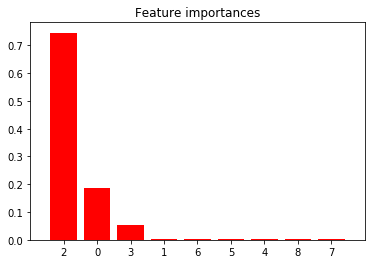

In [93]:
#Plotting importance of features for bagging regressor
indices = np.argsort(feature_importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feature_importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [94]:
#Test MSE for Bagging model
y_pred = bagging.predict(X_test)
mean_sqaured_error=mse(y_test, y_pred)
print('MSE:', mean_sqaured_error)

MSE: 2.471394886363636


In [95]:
#fitting random forest regression model
reg1 = RandomForestRegressor()
reg1.fit(X_train,y_train)
score = reg1.score(X_test, y_test)
print(score)

0.9801331597705708


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [96]:
#importance of features for random forest regressor
feature_importances = np.mean([tree.feature_importances_ for tree in reg1.estimators_], axis=0)
feature_importances

array([0.0452099 , 0.00336814, 0.88515418, 0.05784718, 0.00190431,
       0.00155234, 0.00174424, 0.00158079, 0.00163894])

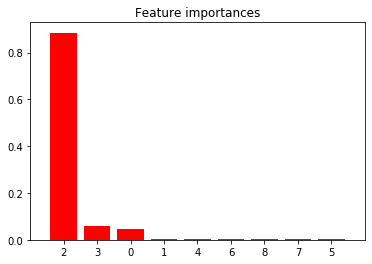

In [97]:
#Plotting importance of features for random forest regressor
indices = np.argsort(feature_importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feature_importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [98]:
#Test MSE for Random Forest model
y_pred = reg1.predict(X_test)
mean_sqaured_error=mse(y_test, y_pred)
print('MSE:', mean_sqaured_error)

MSE: 2.119886363636361


In [100]:
#MSE vs the number of variables considered at each split 
max_features_range = list(range(2, 10))
mean_sqaured_error=[]
accuracy = []
cv_scores_list=[]
for features in max_features_range:
    print('Variables Considered:', features)
    reg2 = RandomForestRegressor(max_features = features)
    reg2.fit(X_train, y_train)
    score = reg2.score(X_test, y_test)
    print('Accuracy:', score)
    accuracy.append(score)
    y_pred = reg2.predict(X_test)
    mean_sqaured_error=mse(y_test, y_pred)
    print('MSE:', mean_sqaured_error)

Variables Considered: 2
Accuracy: 0.9353913103377034
MSE: 6.894054545454545
Variables Considered: 3
Accuracy: 0.9727818112085266
MSE: 2.904310227272724
Variables Considered: 4
Accuracy: 0.9806204324988995
MSE: 2.0678920454545477
Variables Considered: 5
Accuracy: 0.9802724566187084
MSE: 2.105022727272726
Variables Considered: 6
Accuracy: 0.9743310679846168
MSE: 2.738997159090907
Variables Considered: 7
Accuracy: 0.9817647859252483
MSE: 1.9457840909090913
Variables Considered: 8
Accuracy: 0.9731216188408184
MSE: 2.8680511363636394
Variables Considered: 9
Accuracy: 0.9800720363562063
MSE: 2.126408522727271


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

In [101]:
#fitting gradient boost regressor model
grad=GradientBoostingRegressor()
grad.fit(X_train,y_train)
score = grad.score(X_test, y_test)
print(score)

0.9873715744280853


In [198]:
#MSE for gradient boost model
y_pred = grad.predict(X_test)
mean_sqaured_error=mse(y_test, y_pred)
print('MSE:', mean_sqaured_error)

MSE: 1.5439941187873523


In [199]:
#dropping total_score column from dataset and setting year = 2016
df_filtered1 = df.query('year==2016')
df_filtered1.drop(["total_score"], axis = 1, inplace = True)
df_filtered1.head()

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,world_rank,university_name,country,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64,97.6,99.8,97.8,"2,243",6.9,27%,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,"19,919",11.6,34%,46:54:00,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,"15,596",7.8,22%,42:58:00,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55,"18,812",11.8,34%,46:54:00,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84,88.6,99.7,95.4,"11,074",9.0,33%,37 : 63,2016


In [200]:
#checking for missing values
df_filtered1.isnull().sum()

world_rank                 0
university_name            0
country                    0
teaching                   0
international              0
research                   0
citations                  0
income                     0
num_students               7
student_staff_ratio        7
international_students    10
female_male_ratio         61
year                       0
dtype: int64

In [201]:
#dropping missing values
df_filtered1.dropna(subset=['num_students', 'student_staff_ratio', 'international_students', 'female_male_ratio'], inplace=True)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [202]:
df_filtered1.isnull().sum()

world_rank                0
university_name           0
country                   0
teaching                  0
international             0
research                  0
citations                 0
income                    0
num_students              0
student_staff_ratio       0
international_students    0
female_male_ratio         0
year                      0
dtype: int64

In [203]:
#dropping rows with hyphen in income column, dropping commas in num_students column and dropping % (string) from international_students column 
df_filtered1=df_filtered1[~df_filtered1.income.str.contains("-")]
df_filtered1['num_students'] = df_filtered1['num_students'].apply(lambda x: float(x.split()[0].replace(',', '')))
df_filtered1['international_students'] = df_filtered1['international_students'].map(lambda x: x.rstrip('%'))
df_filtered1

,world_rank,university_name,country,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64,97.6,99.8,97.8,2243.0,6.9,27,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,19919.0,11.6,34,46:54:00,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,15596.0,7.8,22,42:58:00,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55,18812.0,11.8,34,46:54:00,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84,88.6,99.7,95.4,11074.0,9.0,33,37 : 63,2016
1809,7,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,7929.0,8.4,27,45:55:00,2016
1810,8,Imperial College London,United Kingdom,83.3,96,88.5,96.7,53.7,15060.0,11.7,51,37 : 63,2016
1811,9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80,18178.0,14.7,37,31 : 69,2016
1812,10,University of Chicago,United States of America,85.7,65,88.9,99.2,36.6,14221.0,6.9,21,42:58:00,2016
1813,11,Johns Hopkins University,United States of America,77.6,70,90.4,98.2,100,15128.0,3.6,23,50:50:00,2016


In [204]:
#dropping the extra ratio and converting ratio (string) to decimal (float) in female_male_ratio column
df_filtered1 = df_filtered1[~df_filtered1.female_male_ratio.str.contains("-")]
df_filtered1['female_male_ratio'] = df_filtered1['female_male_ratio'].map(lambda x: x.rstrip(':00'))
for x in range(len(df_filtered1)):
    idx = df_filtered1.iloc[x].name
    fmr=df_filtered1['female_male_ratio'].iloc[x]
    if type(fmr)!=float:
        if ":" in fmr:
            str_arr=fmr.split(':')
            dec_value=float(str_arr[0])/float(str_arr[1])
            df_filtered1.set_value(idx, 'female_male_ratio', dec_value)
df_filtered1

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


,world_rank,university_name,country,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64,97.6,99.8,97.8,2243.0,6.9,27,0.492537,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,19919.0,11.6,34,0.851852,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,15596.0,7.8,22,0.724138,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55,18812.0,11.8,34,0.851852,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84,88.6,99.7,95.4,11074.0,9.0,33,0.587302,2016
1809,7,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,7929.0,8.4,27,0.818182,2016
1810,8,Imperial College London,United Kingdom,83.3,96,88.5,96.7,53.7,15060.0,11.7,51,0.587302,2016
1811,9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80,18178.0,14.7,37,0.449275,2016
1812,10,University of Chicago,United States of America,85.7,65,88.9,99.2,36.6,14221.0,6.9,21,0.724138,2016
1813,11,Johns Hopkins University,United States of America,77.6,70,90.4,98.2,100,15128.0,3.6,23,10,2016


In [205]:
df_filtered1['world_rank'] = df_filtered1['world_rank'].apply(lambda x: float(x.split()[0].replace('-', '')))
df_filtered1['world_rank'] = df_filtered1['world_rank'].apply(lambda x: float((str(x).replace('201250', '201'))))
df_filtered1['world_rank'] = df_filtered1['world_rank'].apply(lambda x: float((str(x).replace('251300', '251'))))
df_filtered1['world_rank'] = df_filtered1['world_rank'].apply(lambda x: float((str(x).replace('301351', '301'))))
df_filtered1['world_rank'] = df_filtered1['world_rank'].apply(lambda x: float((str(x).replace('351400', '351'))))
df_filtered1['world_rank'] = df_filtered1['world_rank'].apply(lambda x: float((str(x).replace('401500', '401'))))
df_filtered1['world_rank'] = df_filtered1['world_rank'].apply(lambda x: float((str(x).replace('501600', '501'))))
df_filtered1['world_rank'] = df_filtered1['world_rank'].apply(lambda x: float((str(x).replace('601800', '601'))))
print (df_filtered1['world_rank'])

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

1803      1.0
1804      2.0
1805      3.0
1806      4.0
1807      5.0
1809      7.0
1810      8.0
1811      9.0
1812     10.0
1813     11.0
1814     12.0
1815     13.0
1816     14.0
1818     16.0
1819     17.0
1820     18.0
1822     20.0
1823     21.0
1824     22.0
1826     24.0
1827     25.0
1828     26.0
1829     27.0
1830     28.0
1831     29.0
1832     30.0
1833     31.0
1834     32.0
1835     33.0
1836     34.0
        ...  
2568    601.0
2569    601.0
2570    601.0
2571    601.0
2572    601.0
2576    601.0
2577    601.0
2578    601.0
2579    601.0
2580    601.0
2581    601.0
2582    601.0
2583    601.0
2584    601.0
2585    601.0
2586    601.0
2587    601.0
2588    601.0
2589    601.0
2590    601.0
2591    601.0
2592    601.0
2593    601.0
2594    601.0
2596    601.0
2597    601.0
2598    601.0
2599    601.0
2601    601.0
2602    601.0
Name: world_rank, Length: 702, dtype: float64


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [206]:
X=df_filtered1[['teaching','international', 'research', 'citations', 'income', 'num_students', 'student_staff_ratio', 'international_students', 'female_male_ratio']]
y=df_filtered1['world_rank']
X

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,female_male_ratio
1803,95.6,64,97.6,99.8,97.8,2243.0,6.9,27,0.492537
1804,86.5,94.4,98.9,98.8,73.1,19919.0,11.6,34,0.851852
1805,92.5,76.3,96.2,99.9,63.3,15596.0,7.8,22,0.724138
1806,88.2,91.5,96.7,97.0,55,18812.0,11.8,34,0.851852
1807,89.4,84,88.6,99.7,95.4,11074.0,9.0,33,0.587302
1809,85.1,78.5,91.9,99.3,52.1,7929.0,8.4,27,0.818182
1810,83.3,96,88.5,96.7,53.7,15060.0,11.7,51,0.587302
1811,77.0,97.9,95.0,91.1,80,18178.0,14.7,37,0.449275
1812,85.7,65,88.9,99.2,36.6,14221.0,6.9,21,0.724138
1813,77.6,70,90.4,98.2,100,15128.0,3.6,23,10


In [207]:
#scaling the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[1.        , 0.61314655, 0.98609626, ..., 0.03888889, 0.32926829,
        0.01645446],
       [0.89381564, 0.94073276, 1.        , ..., 0.06790123, 0.41463415,
        0.03192688],
       [0.9638273 , 0.74568966, 0.97112299, ..., 0.04444444, 0.26829268,
        0.0264274 ],
       ...,
       [0.05367561, 0.08405172, 0.02352941, ..., 0.17345679, 0.02439024,
        0.01946712],
       [0.11901984, 0.17456897, 0.11336898, ..., 0.07098765, 0.09756098,
        0.01199127],
       [0.07351225, 0.11422414, 0.13796791, ..., 0.12345679, 0.04878049,
        0.02772991]])

In [208]:
#splitting the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1)

In [209]:
#fitting classification decision tree
clf = tree.DecisionTreeClassifier()#max_depth = 2
clf = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.375


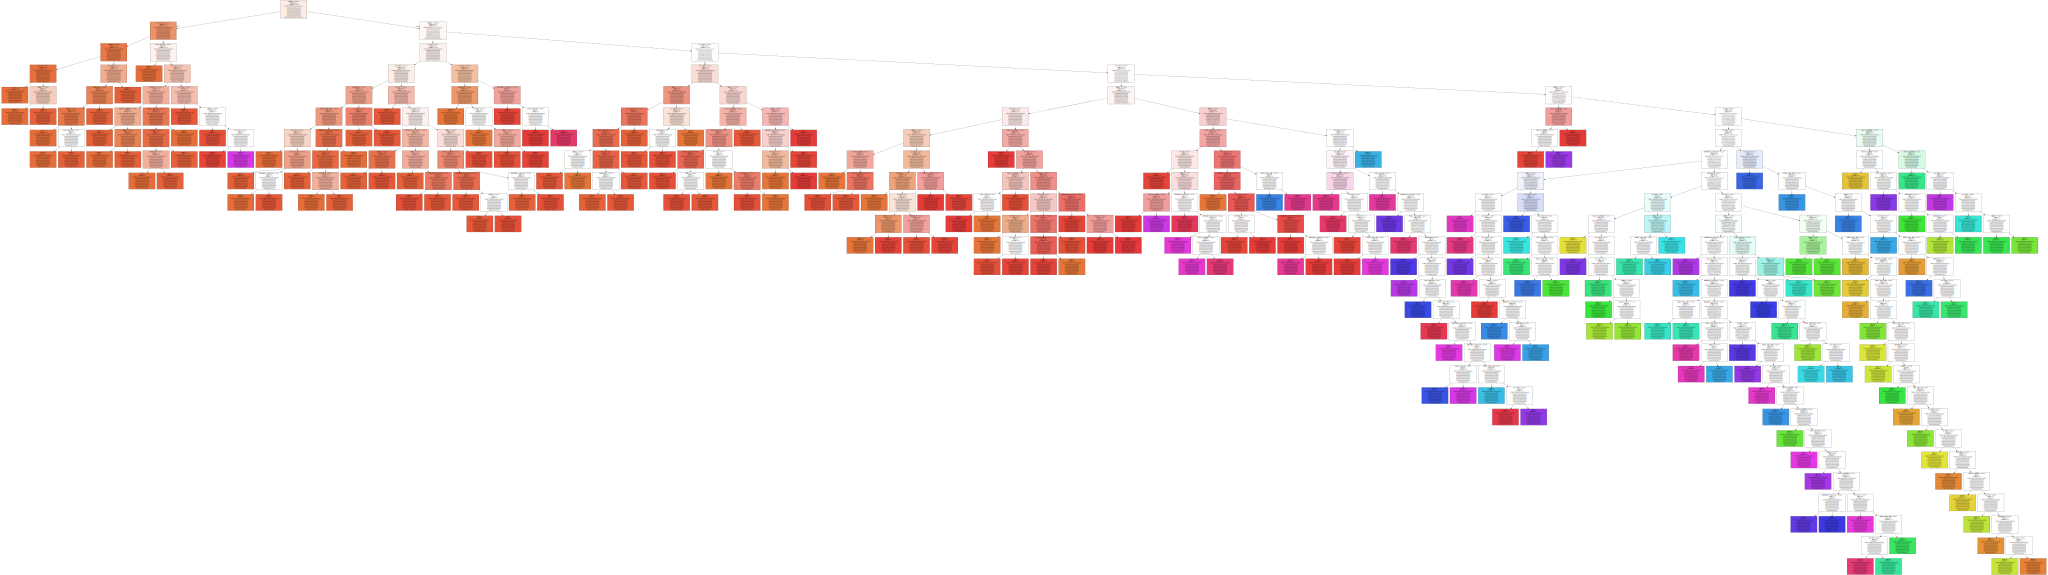

In [210]:
#Plotting classification decision tree
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=X.columns, filled = True))
display(SVG(graph.pipe(format='svg')))

In [211]:
#MSE for decision tree classifier model
y_pred = clf.predict(X_test)
mean_sqaured_error=mse(y_test, y_pred)
print('MSE:', mean_sqaured_error)

MSE: 6178500463.778409


In [212]:
#Cross Validation to determine the optimal level of tree complexity
max_depth_range = list(range(1, 6))
mean_sqaured_error=[]
accuracy = []
cv_scores_list=[]
for depth in max_depth_range:
    print('Tree Depth:', depth)
    clf1 = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf1.fit(X_train, y_train)
    score = clf1.score(X_test, y_test)
    print('Accuracy:', score)
    accuracy.append(score)
    y_pred = clf1.predict(X_test)
    mean_sqaured_error=mse(y_test, y_pred)
    print('MSE:', mean_sqaured_error)
    cv_scores = cross_val_score(clf1, X_scaled, y,cv=5)
    cv_scores_list.append(np.mean(cv_scores))
    print('Cross-validation scores (5-fold):', cv_scores)
    print('Mean cross-validation score (5-fold): {:.3f}'.format(np.mean(cv_scores)))

Tree Depth: 1
Accuracy: 0.3181818181818182
MSE: 2573056727.653409
Cross-validation scores (5-fold): [0.20731707 0.34306569 0.3963964  0.41904762 0.45631068]
Mean cross-validation score (5-fold): 0.364
Tree Depth: 2
Accuracy: 0.3181818181818182
MSE: 2576452068.5625
Cross-validation scores (5-fold): [0.21544715 0.35036496 0.43243243 0.37142857 0.4368932 ]
Mean cross-validation score (5-fold): 0.361
Tree Depth: 3
Accuracy: 0.32386363636363635
MSE: 4635498233.539773


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross-validation scores (5-fold): [0.22764228 0.42335766 0.45045045 0.52380952 0.55339806]
Mean cross-validation score (5-fold): 0.436
Tree Depth: 4
Accuracy: 0.375
MSE: 4120088930.5113635
Cross-validation scores (5-fold): [0.2804878  0.42335766 0.52252252 0.53333333 0.55339806]
Mean cross-validation score (5-fold): 0.463
Tree Depth: 5
Accuracy: 0.3522727272727273
MSE: 4120598479.9772725
Cross-validation scores (5-fold): [0.2601626  0.42335766 0.52252252 0.53333333 0.58252427]
Mean cross-validation score (5-fold): 0.464


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [213]:
#fitting classification bagging model with KNN classifier
bagging = BaggingClassifier(KNeighborsClassifier())
bagging.fit(X_train,y_train)
score = bagging.score(X_test, y_test)
print(score)

0.38636363636363635


In [214]:
#fitting classification bagging model with decision tree classifier
bagging = BaggingClassifier(DecisionTreeClassifier())
bagging.fit(X_train,y_train)
score = bagging.score(X_test, y_test)
print(score)

0.4375


In [215]:
#MSE for bagging classifier model
y_pred = bagging.predict(X_test)
mean_sqaured_error=mse(y_test, y_pred)
print('MSE:', mean_sqaured_error)

MSE: 5663040339.261364


In [216]:
#feature importance in bagging classification
feature_importances = np.mean([tree.feature_importances_ for tree in bagging.estimators_], axis=0)
feature_importances

array([0.1173039 , 0.06968683, 0.19535749, 0.32398096, 0.06009768,
       0.06987492, 0.06050442, 0.05577089, 0.04742292])

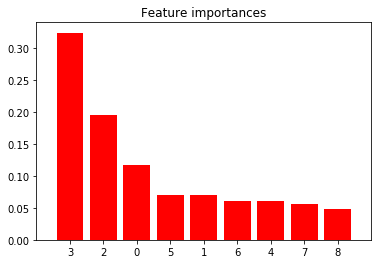

In [217]:
#Plotting feature importance in bagging classification
indices = np.argsort(feature_importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feature_importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [218]:
#fitting classification random forest
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
score

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.42045454545454547

In [219]:
#MSE for Random Forest classifier model
y_pred = clf.predict(X_test)
mean_sqaured_error=mse(y_test, y_pred)
print('MSE:', mean_sqaured_error)

MSE: 6179183964.369318


In [220]:
#feature importance in random forest classification
feature_importances = np.mean([tree.feature_importances_ for tree in clf.estimators_], axis=0)
feature_importances

array([0.12225972, 0.08046801, 0.16668708, 0.28067682, 0.07150828,
       0.0734821 , 0.08207579, 0.06522892, 0.05761329])

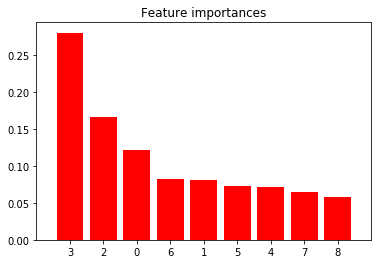

In [221]:
#Plotting feature importance in random forest classification
indices = np.argsort(feature_importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feature_importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [222]:
#Effect of the optimal number of variables considered at each split, on the error rate obtained
max_features_range = list(range(2, 10))
mean_sqaured_error=[]
accuracy = []
for features in max_features_range:
    print('Variables Considered:', features)
    clf2 = RandomForestClassifier(max_features = features)
    clf2.fit(X_train, y_train)
    score = clf2.score(X_test, y_test)
    print('Accuracy:', score)
    accuracy.append(score)
    y_pred = clf2.predict(X_test)
    mean_sqaured_error=mse(y_test, y_pred)
    print('MSE:', mean_sqaured_error)

Variables Considered: 2
Accuracy: 0.375
MSE: 5663500853.255682
Variables Considered: 3
Accuracy: 0.42045454545454547
MSE: 3089507894.3920455
Variables Considered: 4
Accuracy: 0.4431818181818182
MSE: 5663895502.670455
Variables Considered: 5
Accuracy: 0.4147727272727273
MSE: 4634688347.357955
Variables Considered: 6


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

Accuracy: 0.4431818181818182
MSE: 3089849474.7727275
Variables Considered: 7
Accuracy: 0.4375
MSE: 5148265167.522727
Variables Considered: 8
Accuracy: 0.42045454545454547
MSE: 5663912897.630682
Variables Considered: 9


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.42045454545454547
MSE: 4633661045.215909


In [223]:
#fitting classification gradient boosting model
grad=GradientBoostingClassifier()
grad.fit(X_train,y_train)
score = grad.score(X_test, y_test)
print(score)

0.4034090909090909


In [224]:
#MSE for gradient boosting classifier model
y_pred = grad.predict(X_test)
mean_sqaured_error=mse(y_test, y_pred)
print('MSE:', mean_sqaured_error)

MSE: 3089683491.721591


In [225]:
#including the country column as dummy variable in the dataset and studying the changes in accuracy of ensemble models
a = pd.get_dummies(df_filtered['country'])
Z=df_filtered[['teaching','international', 'research', 'citations', 'income', 'num_students', 'student_staff_ratio', 'international_students', 'female_male_ratio']]
X=Z.combine_first(a)
y=df_filtered['total_score']
X

,Argentina,Australia,Austria,Belarus,Belgium,Brazil,Canada,Chile,China,Colombia,...,United States of America,citations,female_male_ratio,income,international,international_students,num_students,research,student_staff_ratio,teaching
1803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,99.8,0.492537,97.8,64,27,2243.0,97.6,6.9,95.6
1804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,98.8,0.851852,73.1,94.4,34,19919.0,98.9,11.6,86.5
1805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,99.9,0.724138,63.3,76.3,22,15596.0,96.2,7.8,92.5
1806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,97.0,0.851852,55,91.5,34,18812.0,96.7,11.8,88.2
1807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,99.7,0.587302,95.4,84,33,11074.0,88.6,9.0,89.4
1809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,99.3,0.818182,52.1,78.5,27,7929.0,91.9,8.4,85.1
1810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,96.7,0.587302,53.7,96,51,15060.0,88.5,11.7,83.3
1811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,91.1,0.449275,80,97.9,37,18178.0,95.0,14.7,77.0
1812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,99.2,0.724138,36.6,65,21,14221.0,88.9,6.9,85.7
1813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,98.2,10,100,70,23,15128.0,90.4,3.6,77.6


In [226]:
#scaling of features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.98609626, 0.03888889,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.06790123,
        0.89381564],
       [0.        , 0.        , 0.        , ..., 0.97112299, 0.04444444,
        0.9638273 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.02352941, 0.17345679,
        0.05367561],
       [0.        , 0.        , 0.        , ..., 0.11336898, 0.07098765,
        0.11901984],
       [0.        , 0.        , 0.        , ..., 0.13796791, 0.12345679,
        0.07351225]])

In [227]:
#splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1)

In [228]:
#fitting regression decision tree 
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
score = dt.score(X_test, y_test)
print(score)

0.9648818588364695


In [229]:
#MSE for Decision Tree regression model
y_pred = dt.predict(X_test)
mean_sqaured_error=mse(y_test, y_pred)
print('MSE:', mean_sqaured_error)

MSE: 3.7472727272727244


In [230]:
#fitting regression bagging model
bagging = BaggingRegressor()
bagging.fit(X_train,y_train)
score = bagging.score(X_test, y_test)
print(score)

0.9841688173626919


In [231]:
#fitting random forest regression model
reg1 = RandomForestRegressor()
reg1.fit(X_train,y_train)
score = reg1.score(X_test, y_test)
print(score)

0.976133758762508


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [232]:
#fitting gradient boost regressor model
grad=GradientBoostingRegressor()
grad.fit(X_train,y_train)
score = grad.score(X_test, y_test)
print(score)

0.9866690238769089
